# Self join

Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.


* To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.
* Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.



In [1]:
import pandas as pd

crews = pd.read_csv("/kaggle/input/crew-members/CrewMemebers.csv",index_col = 0)
crews.head()

,Cabins,CruiseType,Length,Passengers,PassengerDensity,Tonnage,CrewRequired
Age,,,,,,,
22,0.33,Costa,2.80,0.66,50.62,3.341,0.59
22,0.33,Costa,2.79,0.66,50.62,3.341,0.59
12,0.45,Costa,2.96,0.94,24.78,2.329,0.60
27,0.74,Costa,4.40,1.67,32.04,5.350,0.88
25,0.74,Costa,4.40,1.58,33.86,5.350,0.88


In [2]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='Age', how='inner',
                                suffixes=('_dir','_crew'))

crews_self_merged.head()



,Cabins_dir,CruiseType_dir,Length_dir,Passengers_dir,PassengerDensity_dir,Tonnage_dir,CrewRequired_dir,Cabins_crew,CruiseType_crew,Length_crew,Passengers_crew,PassengerDensity_crew,Tonnage_crew,CrewRequired_crew
Age,,,,,,,,,,,,,,
22,0.33,Costa,2.8,0.66,50.62,3.341,0.59,0.33,Costa,2.80,0.66,50.62,3.341,0.59
22,0.33,Costa,2.8,0.66,50.62,3.341,0.59,0.33,Costa,2.79,0.66,50.62,3.341,0.59
22,0.33,Costa,2.8,0.66,50.62,3.341,0.59,6.54,Princess,7.18,13.02,40.65,52.926,6.17
22,0.33,Costa,2.8,0.66,50.62,3.341,0.59,7.95,Princess,8.03,15.90,43.93,69.845,6.96
22,0.33,Costa,2.8,0.66,50.62,3.341,0.59,11.77,Celebrity,8.80,27.44,30.94,73.941,8.22


In [3]:
# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['Passengers_dir'] ==  0.66) & 
                  (crews_self_merged['Passengers_crew'] !=  0.66))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

     Cabins_dir CruiseType_dir  Length_dir  Passengers_dir  \
Age                                                          
22         0.33          Costa        2.80            0.66   
22         0.33          Costa        2.80            0.66   
22         0.33          Costa        2.80            0.66   
22         0.33          Costa        2.80            0.66   
22         0.33          Costa        2.79            0.66   

     PassengerDensity_dir  Tonnage_dir  CrewRequired_dir  Cabins_crew  \
Age                                                                     
22                  50.62        3.341              0.59         6.54   
22                  50.62        3.341              0.59         7.95   
22                  50.62        3.341              0.59        11.77   
22                  50.62        3.341              0.59        10.20   
22                  50.62        3.341              0.59         6.54   

    CruiseType_crew  Length_crew  Passengers_crew  Pa

**By merging the table to itself, you compared the value of the __director__ from the jobs column to other values from the jobs column. With the output, you can quickly see different movie directors and the people they worked with in the same movie.**

**pandas treats a merge of a table to itself the same as any other merge. Therefore, it does not limit you from chaining multiple .merge() methods together.**

**Index merge for movie ratings**

To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Ensure that your merge returns all rows from the movies table, and only matching rows from the ratings table.

The movies and ratings tables have been loaded for you.


* Merge the movies and ratings tables on the id column, keeping all rows from the movies table, and save the result as movies_ratings.

In [7]:
credits = pd.read_csv("/kaggle/input/netflix-tv-shows-and-movies/credits.csv", index_col = 0)
titles =  pd.read_csv("/kaggle/input/netflix-tv-shows-and-movies/titles.csv", index_col = 0)

print(credits.head())


                id             name                character   role
person_id                                                          
3748       tm84618   Robert De Niro            Travis Bickle  ACTOR
14658      tm84618     Jodie Foster            Iris Steensma  ACTOR
7064       tm84618    Albert Brooks                      Tom  ACTOR
3739       tm84618    Harvey Keitel  Matthew 'Sport' Higgins  ACTOR
48933      tm84618  Cybill Shepherd                    Betsy  ACTOR


In [8]:
print(titles.head())

                                        title   type  \
id                                                     
ts300399  Five Came Back: The Reference Films   SHOW   
tm84618                           Taxi Driver  MOVIE   
tm154986                          Deliverance  MOVIE   
tm127384      Monty Python and the Holy Grail  MOVIE   
tm120801                      The Dirty Dozen  MOVIE   

                                                description  release_year  \
id                                                                          
ts300399  This collection includes 12 World War II-era p...          1945   
tm84618   A mentally unstable Vietnam War veteran works ...          1976   
tm154986  Intent on seeing the Cahulawassee River before...          1972   
tm127384  King Arthur, accompanied by his squire, recrui...          1975   
tm120801  12 American military prisoners in World War II...          1967   

         age_certification  runtime  \
id                          

In [12]:
# Merge to the movies table the ratings table on the index
movies_ratings = credits.merge(titles, on = "id")

print(movies_ratings.columns)

# Print the first few rows of movies_ratings
print(movies_ratings.head())

Index(['id', 'name', 'character', 'role', 'title', 'type', 'description',
       'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')
        id             name                character   role        title  \
0  tm84618   Robert De Niro            Travis Bickle  ACTOR  Taxi Driver   
1  tm84618     Jodie Foster            Iris Steensma  ACTOR  Taxi Driver   
2  tm84618    Albert Brooks                      Tom  ACTOR  Taxi Driver   
3  tm84618    Harvey Keitel  Matthew 'Sport' Higgins  ACTOR  Taxi Driver   
4  tm84618  Cybill Shepherd                    Betsy  ACTOR  Taxi Driver   

    type                                        description  release_year  \
0  MOVIE  A mentally unstable Vietnam War veteran works ...          1976   
1  MOVIE  A mentally unstable Vietnam War veteran works ...          1976   
2  MOVIE  A mentally unstable

Merging on indexes is just like merging on columns, so if you need to merge based on indexes, there's no need to turn the indexes into columns first.

**Do sequels earn more?**

It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The sequels and financials tables have been provided.

* With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.
* Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.
* Select the title_org, title_seq, and diff columns of orig_seq and save this as titles_diff.
* Sort by titles_diff by diff in descending order and print the first few rows.

In [25]:
# Ensure both 'person_id' and 'id' are of the same type (convert both to string for consistency)
sequels_fin['person_id'] = sequels_fin['person_id'].astype(str)
sequels_fin['id'] = sequels_fin['id'].astype(str)

# Now proceed with the merge and subsequent operations
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='person_id', 
                             right_on='id', suffixes=('_org', '_seq'))

# Add calculation to subtract tmdb_score_org from imdb_score_org (since the columns have suffixes after the merge)
if 'imdb_score_org' in orig_seq.columns and 'tmdb_score_org' in orig_seq.columns:
    orig_seq['diff'] = orig_seq['imdb_score_org'] - orig_seq['tmdb_score_org']
else:
    print("The columns 'imdb_score_org' or 'tmdb_score_org' are missing.")

# Select the title_org, title_seq, and diff (assuming columns exist)
if 'title_org' in orig_seq.columns and 'title_seq' in orig_seq.columns:
    titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]
    # Print the first rows of the sorted titles_diff
    print(titles_diff.sort_values('diff', ascending=False).head())
else:
    print("The columns 'title_org' or 'title_seq' are missing.")


Empty DataFrame
Columns: [title_org, title_seq, diff]
Index: []


In [ ]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending = False).head())

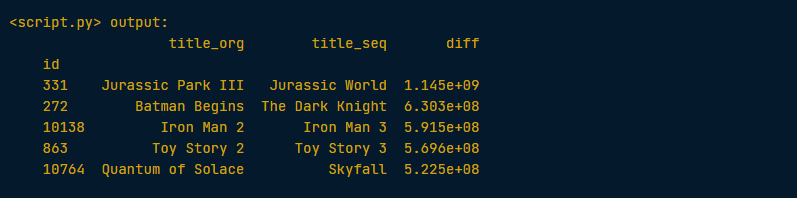

Amazing, that was great work! To complete this exercise, you needed to merge tables on their index and merge another table to itself. After the calculations were added and sub-select specific columns, the data was sorted. You found out that Jurassic World had one of the highest of all, improvement in revenue compared to the original movie